In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##### first dataset
df_test = pd.read_csv('assets/data/intensity_causes_thickness/t10k-morpho.csv',index_col=0)

print(df_test.intensity.quantile([0,0.25,0.5,0.75,1]))
print(df_test.thickness.quantile([0,0.25,0.5,0.75,1]))

0.00     68.054930
0.25    118.168619
0.50    155.981770
0.75    198.699825
1.00    255.907840
Name: intensity, dtype: float64
0.00    0.410072
0.25    1.990176
0.50    2.458506
0.75    2.956746
1.00    6.286054
Name: thickness, dtype: float64


In [6]:
##### first dataset
df_test_ = pd.read_csv('assets/data/morphomnist/t10k-morpho.csv',index_col=0)

print(df_test_.intensity.quantile([0,0.25,0.5,0.75,1]))
print(df_test_.thickness.quantile([0,0.25,0.5,0.75,1]))

0.00     67.869330
0.25    117.660626
0.50    154.914125
0.75    198.159810
1.00    254.873210
Name: intensity, dtype: float64
0.00    0.908574
0.25    2.054283
0.50    2.440508
0.75    2.882375
1.00    5.880797
Name: thickness, dtype: float64


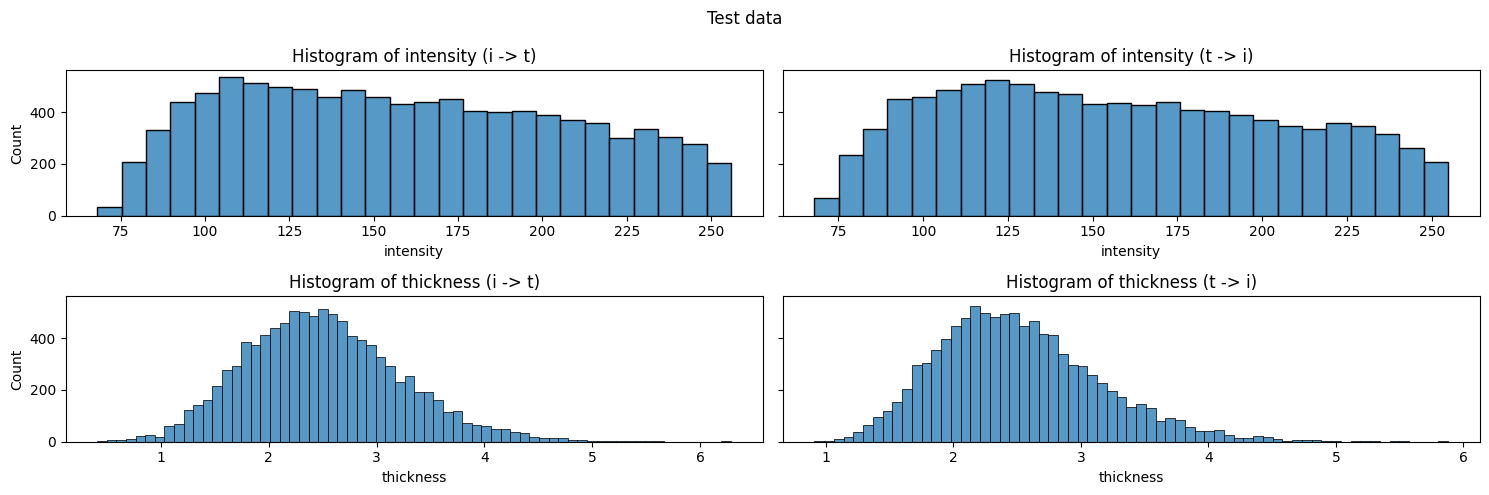

In [7]:
fig, axes = plt.subplots(2,2, figsize=(15,5), sharey=True)

sns.histplot(ax=axes[0,0],data=df_test.intensity)
axes[0,0].set_title('Histogram of intensity (i -> t)')

sns.histplot(ax=axes[1,0],data=df_test.thickness)
axes[1,0].set_title('Histogram of thickness (i -> t)')


sns.histplot(ax=axes[0,1],data=df_test_.intensity)
axes[0,1].set_title('Histogram of intensity (t -> i)')

sns.histplot(ax=axes[1,1],data=df_test_.thickness)
axes[1,1].set_title('Histogram of thickness (t -> i)')

fig.suptitle('Test data')
fig.tight_layout()
fig.show()

## Training data

In [8]:
##### first dataset
df_train = pd.read_csv('assets/data/intensity_causes_thickness/train-morpho.csv',index_col=0)

print(df_train.intensity.quantile([0,0.25,0.5,0.75,1]))
print(df_train.thickness.quantile([0,0.25,0.5,0.75,1]))

0.00     68.366264
0.25    118.622557
0.50    156.013985
0.75    198.755310
1.00    255.989700
Name: intensity, dtype: float64
0.00    0.118970
0.25    1.995756
0.50    2.452916
0.75    2.957205
1.00    7.419737
Name: thickness, dtype: float64


In [9]:
##### first dataset
df_train_ = pd.read_csv('assets/data/morphomnist/train-morpho.csv',index_col=0)

print(df_train_.intensity.quantile([0,0.25,0.5,0.75,1]))
print(df_train_.thickness.quantile([0,0.25,0.5,0.75,1]))

0.00     66.601204
0.25    117.041937
0.50    154.245835
0.75    197.563997
1.00    254.903170
Name: intensity, dtype: float64
0.00    0.875985
0.25    2.048362
0.50    2.434765
0.75    2.888612
1.00    6.255515
Name: thickness, dtype: float64


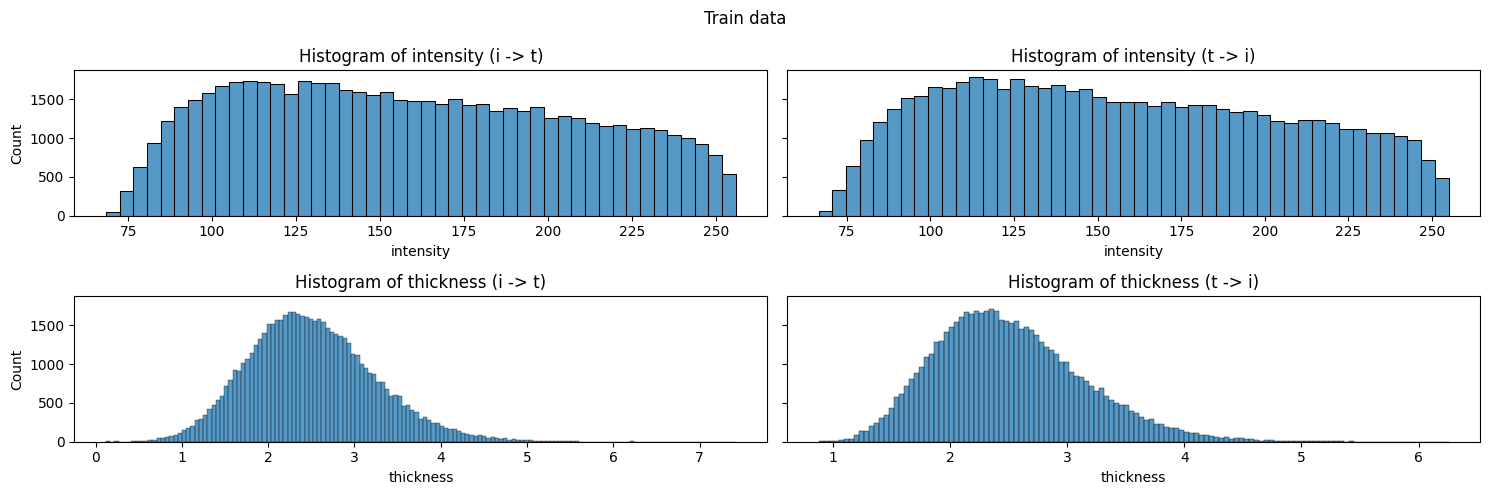

In [10]:
fig, axes = plt.subplots(2,2, figsize=(15,5), sharey=True)

sns.histplot(ax=axes[0,0],data=df_train.intensity)
axes[0,0].set_title('Histogram of intensity (i -> t)')

sns.histplot(ax=axes[1,0],data=df_train.thickness)
axes[1,0].set_title('Histogram of thickness (i -> t)')


sns.histplot(ax=axes[0,1],data=df_train_.intensity)
axes[0,1].set_title('Histogram of intensity (t -> i)')

sns.histplot(ax=axes[1,1],data=df_train_.thickness)
axes[1,1].set_title('Histogram of thickness (t -> i)')

fig.suptitle('Train data')
fig.tight_layout()
fig.show()

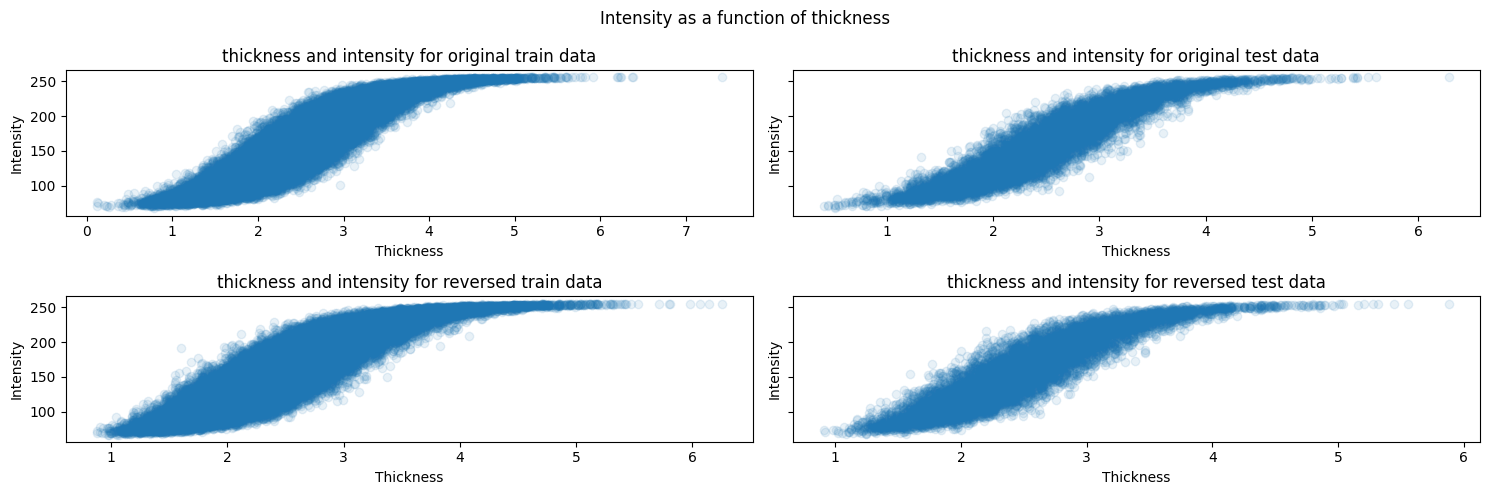

In [26]:
#### Let's test the correlations


fig, axes = plt.subplots(2,2, figsize=(15,5), sharey=True)

axes[0,0].set_as


axes[0,0].plot(df_train.thickness, df_train.intensity, 'o', alpha=0.1)
axes[0,0].set_title('thickness and intensity for original train data')
axes[0,0].set_xlabel('Thickness')
axes[0,0].set_ylabel('Intensity')

axes[0,1].plot(df_test.thickness, df_test.intensity, 'o', alpha=0.1)
axes[0,1].set_title('thickness and intensity for original test data')
axes[0,1].set_xlabel('Thickness')
axes[0,1].set_ylabel('Intensity')


axes[1,0].plot(df_train_.thickness, df_train_.intensity, 'o', alpha=0.1)
axes[1,0].set_title('thickness and intensity for reversed train data')
axes[1,0].set_xlabel('Thickness')
axes[1,0].set_ylabel('Intensity')

axes[1,1].plot(df_test_.thickness, df_test_.intensity, 'o', alpha=0.1)
axes[1,1].set_title('thickness and intensity for reversed test data')
axes[1,1].set_xlabel('Thickness')
axes[1,1].set_ylabel('Intensity')

fig.suptitle('Intensity as a function of thickness')
fig.tight_layout()
fig.show()


In [28]:
## Correlations
print('train original', np.corrcoef(df_train.thickness, df_train.intensity))
print('train reversed', np.corrcoef(df_train_.thickness, df_train_.intensity))
print('test original', np.corrcoef(df_test.thickness, df_test.intensity))
print('test reversed', np.corrcoef(df_test_.thickness, df_test_.intensity))

train original [[1.         0.91893712]
 [0.91893712 1.        ]]
train reversed [[1.         0.90814687]
 [0.90814687 1.        ]]
test original [[1.         0.91913298]
 [0.91913298 1.        ]]
test reversed [[1.         0.90769419]
 [0.90769419 1.        ]]


In [29]:
### Conclusion -> more or less the same

# Test data generation

In [81]:
%load_ext autoreload
%autoreload 2

In [86]:
from deepscm.datasets.morphomnist.create_synth_data_new import model
thickness, intensity = model(10000)

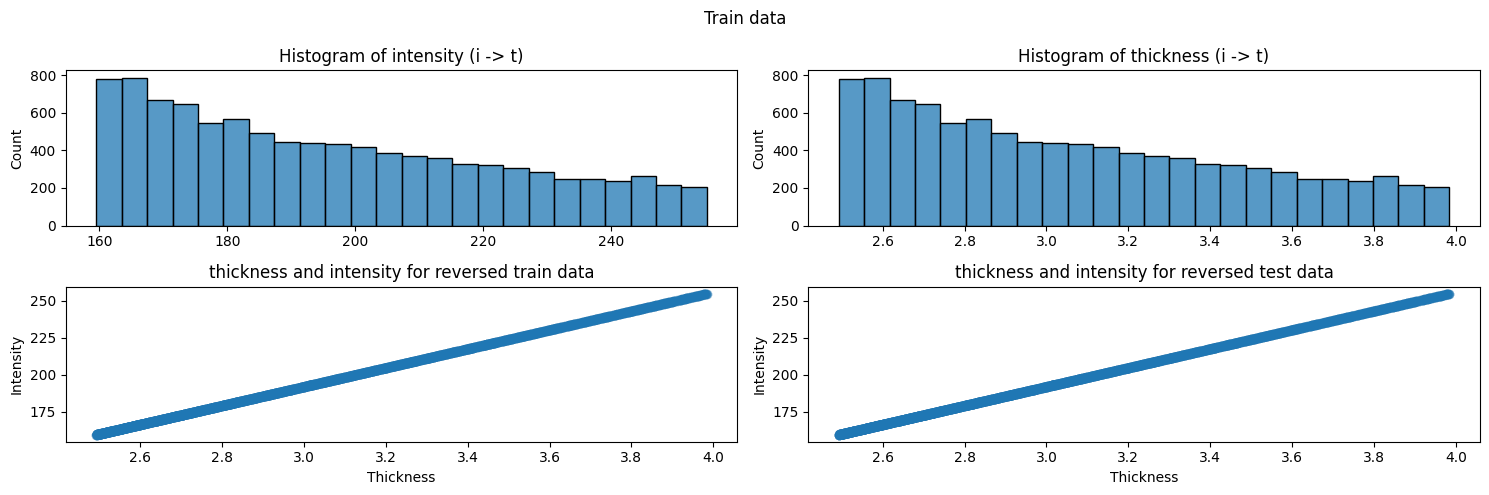

In [87]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.histplot(ax=axes[0,0],data=intensity)
axes[0,0].set_title('Histogram of intensity (i -> t)')

sns.histplot(ax=axes[0,1],data=thickness)
axes[0,1].set_title('Histogram of thickness (i -> t)')

axes[1,0].plot(thickness, intensity, 'o', alpha=0.1)
axes[1,0].set_title('thickness and intensity for reversed train data')
axes[1,0].set_xlabel('Thickness')
axes[1,0].set_ylabel('Intensity')

axes[1,1].plot(thickness, intensity, 'o', alpha=0.1)
axes[1,1].set_title('thickness and intensity for reversed test data')
axes[1,1].set_xlabel('Thickness')
axes[1,1].set_ylabel('Intensity')

fig.suptitle('Train data')
fig.tight_layout()
fig.show()

In [77]:
import torch
q = torch.tensor([0,0.25, 0.5, 0.75,1])

print(np.corrcoef(thickness, intensity))
print(intensity.quantile(q))
print(thickness.quantile(q))

[[1. 1.]
 [1. 1.]]
tensor([159.5402, 168.6006, 175.4554, 184.5280, 240.1895])
tensor([2.4928, 2.6344, 2.7415, 2.8833, 3.7530])
